In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sns
from ntscraper import Nitter
scraper = Nitter(skip_instance_check=False)

Testing instances: 100%|███████████████████████████████████████████████████████████████| 31/31 [01:10<00:00,  2.27s/it]


In [3]:
import nltk
from nltk import PorterStemmer, WordNetLemmatizer

In [11]:
final_df = pd.read_excel("data.xlsx", engine='openpyxl')

In [3]:
terms = ["morocco,earthquake,damage", "morocco,earthquake,alert", "morocco,earthquake,impact", "morocco,earthquake,death", "morocco,earthquake,injury", "morocco,earthquake,help", "morocco,earthquake,sympathy"]
hash_tweets = scraper.get_tweets(terms, mode='term')

In [4]:
hash_tweets

[{'tweets': [{'link': 'https://twitter.com/sinardailymy/status/1733381604188332079#m',
    'text': 'Almost 3,000 died and more than two million people suffered damage to their homes when a 6.8-magnitude earthquake struck Morocco on Sept 8. #Morocco #earthquake https://www.sinardaily.my/article/213565/world/news/three-months-after-quake-morocco-villages-face-winter-chill',
    'user': {'name': 'Sinar Daily',
     'username': '@sinardailymy',
     'profile_id': '1706145575341875200',
     'avatar': 'https://pbs.twimg.com/profile_images/1706145575341875200/OJpTSVQU_bigger.jpg'},
    'date': 'Dec 9, 2023 · 7:02 AM UTC',
    'is-retweet': False,
    'external-link': '',
    'quoted-post': {},
    'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0},
    'pictures': [],
    'videos': [],
    'gifs': []},
   {'link': 'https://twitter.com/jagan_chapagain/status/1733152963395268798#m',
    'text': 'Recovering from disasters takes time.  Three months ago, a powerful earthquake hit Mo

In [6]:
x1 = ['Damage', 'Alert', 'Impact', 'Death', 'Injury','Help', 'Sympathy']

In [7]:
final_df = pd.DataFrame()

In [8]:
def get_table_tweets(i, x1):
    text = [tweet['text'] for tweet in hash_tweets[i]['tweets']]
    user = [tweet['user']['name'] for tweet in hash_tweets[i]['tweets']]
    date = [tweet['date'] for tweet in hash_tweets[i]['tweets']]
    comments = [tweet['stats']['comments'] for tweet in hash_tweets[i]['tweets']]        
    retweets = [tweet['stats']['retweets'] for tweet in hash_tweets[i]['tweets']]        
    likes = [tweet['stats']['likes'] for tweet in hash_tweets[i]['tweets']]        
    quotes = [tweet['stats']['quotes'] for tweet in hash_tweets[i]['tweets']]        
    type = [x1[i] for tweet in hash_tweets[i]['tweets']]
    df1 = pd.DataFrame({"text": text, "date": date, "user": user, "comments": comments, "retweets": retweets, "likes": likes, "quotes": quotes, "type": type})
    return df1

In [10]:
final_df

""


In [17]:
final_df.to_excel("data.xlsx", engine='openpyxl')

In [33]:
import geopandas as gpd

In [34]:
world_data = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

C:\Users\91997\AppData\Local\Temp\ipykernel_4136\2504851905.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [35]:
world_data

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [37]:
states_df = pd.read_csv("./states.csv")

In [38]:
states_gpd = gpd.GeoDataFrame(states_df, geometry=gpd.points_from_xy(states_df.Longitude, states_df.Latitude))

In [39]:
states_gpd

,States,Latitude,Longitude,geometry
0,Chaouia Ouardigha,33.010426,-7.620011,POINT (-7.62001 33.01043)
1,Doukkala Abda,33.260359,-8.509982,POINT (-8.50998 33.26036)
2,Fes Boulemane,34.054600,-5.000377,POINT (-5.00038 34.05460)
3,Gharb Chrarda Beni Hssen,34.810342,-5.570007,POINT (-5.57001 34.81034)
4,Grand Casablanca,33.599976,-7.616367,POINT (-7.61637 33.59998)
5,Guelmim Es Semara,28.430395,-11.100031,POINT (-11.10003 28.43040)
6,Laayoune Boujdour Sakia El Hamra,27.462909,-12.992189,POINT (-12.99219 27.46291)
7,Marrakech Tensift Al Haouz,31.629993,-7.999987,POINT (-7.99999 31.62999)
8,Meknes Tafilalet,31.940413,-4.449972,POINT (-4.44997 31.94041)
9,Oriental,34.690013,-1.909972,POINT (-1.90997 34.69001)


In [40]:
import plotly.express as px


In [42]:
final_df

,text,date,user,comments,retweets,likes,quotes,type
0,"Almost 3,000 died and more than two million pe...","Dec 9, 2023 · 7:02 AM UTC",Sinar Daily,0,0,0,0,Damage
1,Recovering from disasters takes time. Three m...,"Dec 8, 2023 · 3:54 PM UTC",Jagan Chapagain,0,8,22,0,Damage
2,#Earthquake 76 km SW of #Marrakech (#Morocco) ...,"Sep 8, 2023 · 10:40 PM UTC",EMSC,2,47,74,7,Damage
3,"A rare, strong earthquake that occurred late o...","Sep 10, 2023 · 2:26 PM UTC",SA News Channel,15,1182,1139,2,Damage
4,The earthquake that struck Morocco in Septembe...,"Nov 29, 2023 · 6:37 PM UTC",GlobalMedic,0,2,2,0,Damage
...,...,...,...,...,...,...,...,...
8524,"VIDEO | ""Before starting with the formal proce...","Sep 9, 2023 · 5:20 AM UTC",Press Trust of India,10,12,98,2,Sympathy
8525,I would like to express my deepest sympathy to...,"Sep 9, 2023 · 3:05 AM UTC",Sanjeev Kamboj 🇮🇳,1,0,1,0,Sympathy
8526,"The Propeht Muhammad, peace be upon him, said:...","Sep 9, 2023 · 1:45 AM UTC",EA SQUAD FC,0,1,4,0,Sympathy
8527,We extend our deepest sympathy ad heartfelt co...,"Feb 16, 2023 · 10:10 AM UTC",Germany in Morocco,0,2,4,0,Sympathy


In [27]:
import geopandas as gpd

In [28]:
gpd_morocco_df = gpd.read_file("./data/MAR_adm1.shx")

<Axes: >

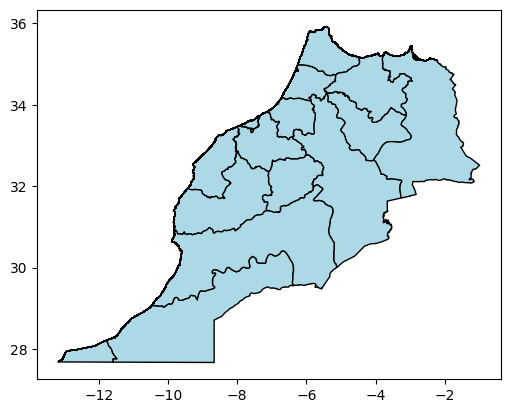

In [29]:
ax1 = gpd_morocco_df.plot(edgecolor='black', color='lightblue')
ax1

In [12]:
final_df['date'] = pd.to_datetime(final_df['date'], format='%b %d, %Y · %I:%M %p UTC')

In [13]:
checker_df = final_df[(final_df['date'] > '2023-09-1') & (final_df['date'] < '2023-9-20')]

In [14]:
checker_df['only_date'] = checker_df['date'].dt.date

C:\Users\91997\AppData\Local\Temp\ipykernel_8244\3425312187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checker_df['only_date'] = checker_df['date'].dt.date


In [15]:
x1_plotter = checker_df.groupby(['only_date', 'type'])['retweets'].sum()

In [16]:
x1_plotter = x1_plotter.reindex()

In [17]:
x1_plotter.loc[x1_plotter.index[1]]

1286

In [18]:
checker_df

,Unnamed: 0,text,date,user,comments,retweets,likes,quotes,type,only_date
2,2,#Earthquake 76 km SW of #Marrakech (#Morocco) ...,2023-09-08 22:40:00,EMSC,2,47,74,7,Damage,2023-09-08
3,3,"A rare, strong earthquake that occurred late o...",2023-09-10 14:26:00,SA News Channel,15,1182,1139,2,Damage,2023-09-10
56,56,"With the recent earthquake in Morocco, many ar...",2023-09-19 21:00:00,CSU Civil and Environmental Engineering,1,2,7,0,Damage,2023-09-19
57,57,Please does this mean an earthquake is coming?...,2023-09-18 20:31:00,Deudeuv,1,0,1,0,Damage,2023-09-18
58,58,Morocco: Architects assess damage in Marrakech...,2023-09-18 20:13:00,Africanian News,0,1,0,0,Damage,2023-09-18
...,...,...,...,...,...,...,...,...,...,...
8522,8522,Sending our heartfelt sympathy to Morocco in t...,2023-09-09 05:40:00,DEBABRATA PAUL,0,0,0,0,Sympathy,2023-09-09
8523,8523,The World Federation of United Nations Friends...,2023-09-09 05:37:00,WFUNF - Middle East & Africa region,0,1,4,1,Sympathy,2023-09-09
8524,8524,"VIDEO | ""Before starting with the formal proce...",2023-09-09 05:20:00,Press Trust of India,10,12,98,2,Sympathy,2023-09-09
8525,8525,I would like to express my deepest sympathy to...,2023-09-09 03:05:00,Sanjeev Kamboj 🇮🇳,1,0,1,0,Sympathy,2023-09-09


In [19]:
plotter_df = checker_df[['only_date', 'retweets', 'type']]

In [20]:
value_counts_series = plotter_df[['only_date', 'type']].value_counts()

In [21]:
value_counts_df = value_counts_series.reset_index(name='count')

In [22]:
value_counts_df.sort_values(by='only_date', inplace=True)

In [25]:
value_counts_df.to_excel("value_type.xlsx")

10-Dec-23 12:40:17 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
10-Dec-23 12:40:17 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


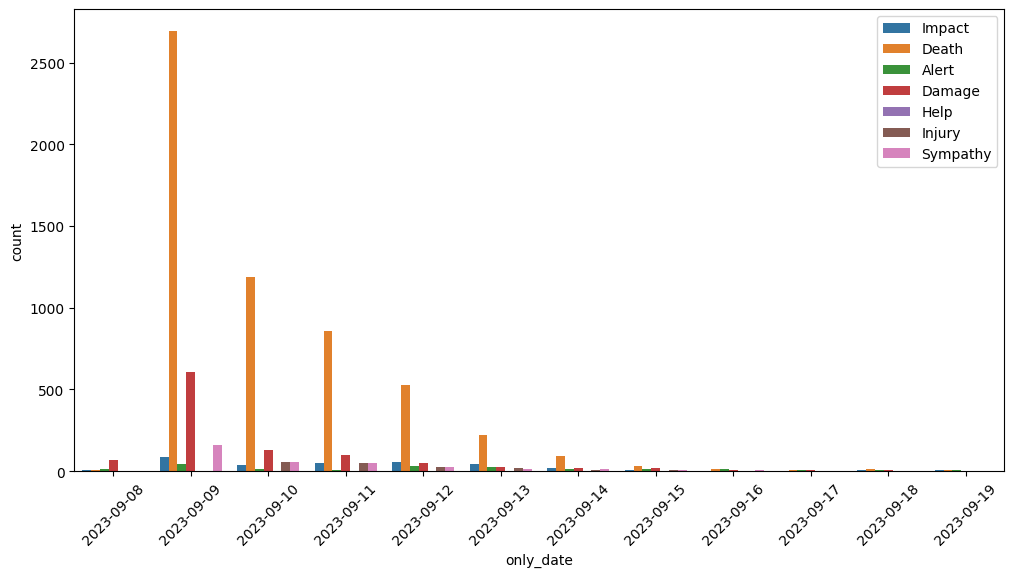

In [193]:
plt.figure(figsize=(12, 6))
sns.barplot(data=value_counts_df, x='only_date', y='count', hue='type')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('classification.png', bbox_inches='tight')

In [194]:
final_df

,Unnamed: 0,text,date,user,comments,retweets,likes,quotes,type
0,0,"Almost 3,000 died and more than two million pe...",2023-12-09 07:02:00,Sinar Daily,0,0,0,0,Damage
1,1,Recovering from disasters takes time. Three m...,2023-12-08 15:54:00,Jagan Chapagain,0,8,22,0,Damage
2,2,#Earthquake 76 km SW of #Marrakech (#Morocco) ...,2023-09-08 22:40:00,EMSC,2,47,74,7,Damage
3,3,"A rare, strong earthquake that occurred late o...",2023-09-10 14:26:00,SA News Channel,15,1182,1139,2,Damage
4,4,The earthquake that struck Morocco in Septembe...,2023-11-29 18:37:00,GlobalMedic,0,2,2,0,Damage
...,...,...,...,...,...,...,...,...,...
8524,8524,"VIDEO | ""Before starting with the formal proce...",2023-09-09 05:20:00,Press Trust of India,10,12,98,2,Sympathy
8525,8525,I would like to express my deepest sympathy to...,2023-09-09 03:05:00,Sanjeev Kamboj 🇮🇳,1,0,1,0,Sympathy
8526,8526,"The Propeht Muhammad, peace be upon him, said:...",2023-09-09 01:45:00,EA SQUAD FC,0,1,4,0,Sympathy
8527,8527,We extend our deepest sympathy ad heartfelt co...,2023-02-16 10:10:00,Germany in Morocco,0,2,4,0,Sympathy


In [231]:
def remove_punct(text):
    import string as st
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [232]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91997\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [233]:
def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english')) 
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return " ".join(filtered_sentence)

In [234]:
def lemm_stem(text):
    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    text = stemmer.stem(text)
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    text = lemmatizer.lemmatize(text)
    return text

In [239]:
def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

In [243]:
def preprocess(text):
    import re
    text = text.lower()
    text = remove_punct(text)
    text = remove_stop_words(text)
    text = lemm_stem(text)
    # Remove irr character and number
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Whitespaces
    text = re.sub(r'^\s*|\s\s*', ' ', text).strip()
    return text

In [244]:
final_df['preprocessed_text'] = final_df['text'].apply(lambda x: preprocess(x))

In [246]:
final_df.to_excel("preprocessed.xlsx")

In [247]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english')
X = cv.fit_transform(final_df['preprocessed_text'])
Xc = (X.T * X)
Xc.setdiag(0)

In [249]:
names = cv.get_feature_names_out()
df = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
df.to_csv('to gephi.csv', sep = ',')

In [255]:
Xc.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [252]:
from wordcloud import WordCloud

In [251]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ---------------------------------------- 300.0/300.0 kB 9.3 MB/s eta 0:00:00


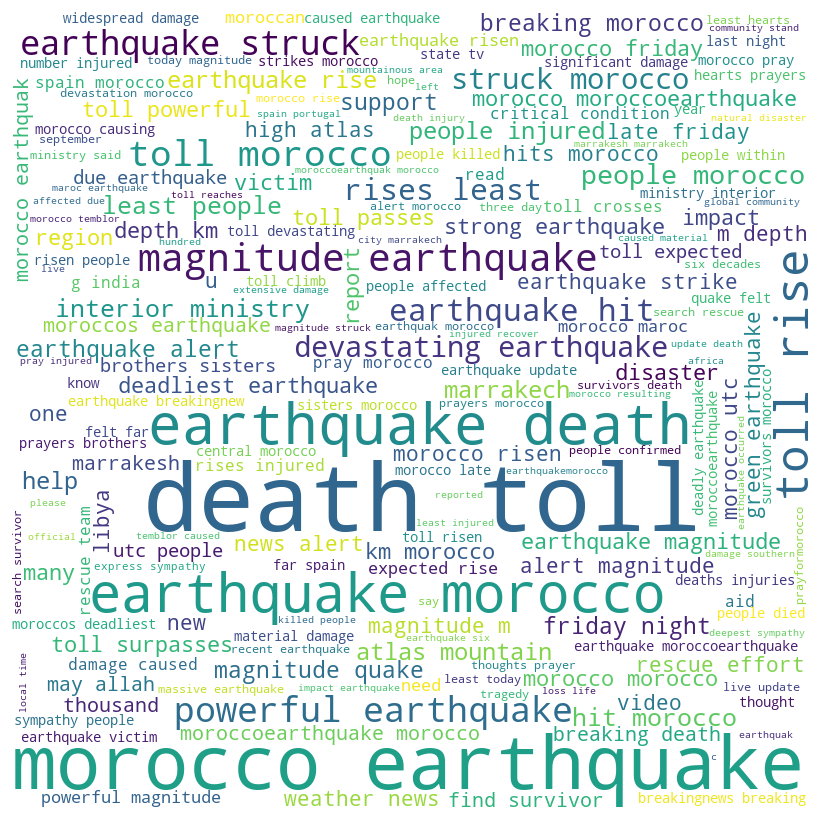

In [259]:
comment_words = '' 
# iterate through the csv file
for val in final_df.preprocessed_text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("wordcloud.png", bbox_inches="tight")
plt.show()

In [263]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming final_df['preprocessed_text'] contains your preprocessed text data

# Create the CountVectorizer
cv = CountVectorizer(ngram_range=(1, 1), stop_words='english')
X = cv.fit_transform(final_df['preprocessed_text'])

# Get feature names and word frequencies
feature_names = cv.get_feature_names_out()
word_frequencies = X.sum(axis=0).A1

# Create a DataFrame with feature names and frequencies
word_freq_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_frequencies})

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Select the top 10-20 words
top_words = word_freq_df.head(10)['Word'].tolist()

# Filter the co-occurrence matrix and feature names for the selected words
selected_indices = [cv.vocabulary_[word] for word in top_words]
X_selected = X[:, selected_indices]
selected_feature_names = [feature_names[idx] for idx in selected_indices]

# Compute the co-occurrence matrix for the selected words
Xc = (X_selected.T * X_selected)
Xc.setdiag(0)

# Create a DataFrame with the co-occurrence matrix
df = pd.DataFrame(data=Xc.toarray(), columns=selected_feature_names, index=selected_feature_names)


In [5]:
df.to_excel("sampling.xlsx")

In [265]:
df.to_csv('to_gephi_updated.csv', sep=',')

In [3]:
import pandas as pd
df = pd.read_csv('to_gephi_updated.csv', sep=',')

In [30]:
final_df

,Unnamed: 0,text,date,user,comments,retweets,likes,quotes,type
0,0,"Almost 3,000 died and more than two million pe...",2023-12-09 07:02:00,Sinar Daily,0,0,0,0,Damage
1,1,Recovering from disasters takes time. Three m...,2023-12-08 15:54:00,Jagan Chapagain,0,8,22,0,Damage
2,2,#Earthquake 76 km SW of #Marrakech (#Morocco) ...,2023-09-08 22:40:00,EMSC,2,47,74,7,Damage
3,3,"A rare, strong earthquake that occurred late o...",2023-09-10 14:26:00,SA News Channel,15,1182,1139,2,Damage
4,4,The earthquake that struck Morocco in Septembe...,2023-11-29 18:37:00,GlobalMedic,0,2,2,0,Damage
...,...,...,...,...,...,...,...,...,...
8524,8524,"VIDEO | ""Before starting with the formal proce...",2023-09-09 05:20:00,Press Trust of India,10,12,98,2,Sympathy
8525,8525,I would like to express my deepest sympathy to...,2023-09-09 03:05:00,Sanjeev Kamboj 🇮🇳,1,0,1,0,Sympathy
8526,8526,"The Propeht Muhammad, peace be upon him, said:...",2023-09-09 01:45:00,EA SQUAD FC,0,1,4,0,Sympathy
8527,8527,We extend our deepest sympathy ad heartfelt co...,2023-02-16 10:10:00,Germany in Morocco,0,2,4,0,Sympathy


In [31]:
f_df = pd.read_excel("preprocessed.xlsx")

In [40]:
f_df['type'].value_counts()

type
Death       5788
Damage      1217
Alert        483
Impact       405
Sympathy     335
Injury       174
Help         127
Name: count, dtype: int64